In [ ]:
#! pip install tensorflow==2.3.0


  Using cached tensorflow-2.3.0-cp37-cp37m-win_amd64.whl.metadata (2.6 kB)
Using cached tensorflow-2.3.0-cp37-cp37m-win_amd64.whl (342.5 MB)
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.11.0
    Uninstalling tensorflow-2.11.0:
      Successfully uninstalled tensorflow-2.11.0


Found 1101 images belonging to 2 classes.
Found 275 images belonging to 2 classes.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Epoch 1/10
35/35 [==============================] - 29s 823ms/step - loss: 0.3128 - acc: 0.8574 - val_loss: 0.0325 - val_acc: 0.9891
Epoch 2/10
35/35 [==============================] - 28s 801ms/step - loss: 0.0911 - acc: 0.9673 - val_loss: 0.0851 - val_acc: 0.9673
Epoch 3/10
35/35 [==============================] - 28s 812ms/step - loss: 0.0596 - acc: 0.9782 - val_loss: 0.0893 - val_acc: 0.9673
Epoch 4/10
35/35 [==============================] - 28s 812ms/step - loss: 0.0597 - acc: 0.9746 - val_loss: 0.0233 - val_acc: 0.9891
Epoch 5/10
35/35 [==============================] - 27s 773ms/step - loss: 0.0624 - acc: 0.9755 - val_loss: 0.0639 - val_acc: 0.9745
Epoch 6/10
35/35 [==============================] - 30s 851ms/step - loss: 0.0346 - acc: 0.9891 - val_loss: 0.1567 - val_acc: 0.9527
Epoch 7/10
35/35 [====================

KeyError: 'accuracy'

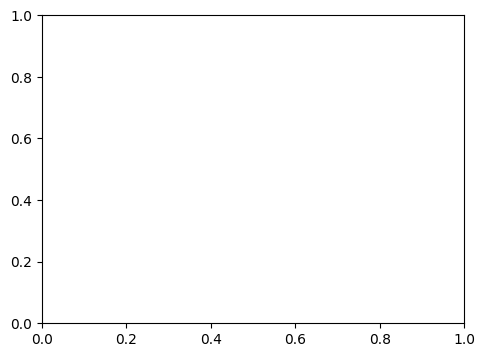

In [1]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Configuración
DATASET_DIR = "data"  # Cambia si tu directorio tiene otro nombre
IMG_SIZE = 224
BATCH_SIZE = 32
EPOCHS = 10

# Generadores de datos
datagen = ImageDataGenerator(
    rescale=1.0/255,
    validation_split=0.2  # Dividir en entrenamiento (80%) y validación (20%)
)

train_data = datagen.flow_from_directory(
    DATASET_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="training"
)

val_data = datagen.flow_from_directory(
    DATASET_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="validation"
)

# Crear modelo usando MobileNetV2
base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))
base_model.trainable = False  # Congelar capas base

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation="relu")(x)
x = Dropout(0.5)(x)
predictions = Dense(2, activation="softmax")(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Compilar modelo
model.compile(optimizer=Adam(learning_rate=0.001), loss="categorical_crossentropy", metrics=["accuracy"])

# Entrenar modelo
history = model.fit(train_data, validation_data=val_data, epochs=EPOCHS)

# Guardar modelo
model.save("mask_detector_model.h5")

# Evaluar modelo
val_loss, val_accuracy = model.evaluate(val_data)
print(f"Precisión en validación: {val_accuracy * 100:.2f}%")

# Graficar métricas
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida')
plt.legend()

plt.show()


In [2]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Cargar modelo entrenado
model = load_model("mask_detector_model.h5")
labels = ["Con mascarilla", "Sin mascarilla"]  # Cambiar el orden para corregir

# Configuración de la cámara
cap = cv2.VideoCapture(0)

IMG_SIZE = 224

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Preprocesar frame
    resized = cv2.resize(frame, (IMG_SIZE, IMG_SIZE))
    normalized = resized / 255.0
    reshaped = np.reshape(normalized, (1, IMG_SIZE, IMG_SIZE, 3))

    # Predicción
    prediction = model.predict(reshaped)
    confidence = np.max(prediction)
    label = labels[np.argmax(prediction)]  # Etiqueta corregida

    # Color del texto según la clase
    color = (0, 255, 0) if label == "Con mascarilla" else (0, 0, 255)

    # Mostrar resultados
    cv2.putText(frame, f"{label} ({confidence * 100:.2f}%)", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)
    cv2.rectangle(frame, (5, 5), (frame.shape[1] - 5, frame.shape[0] - 5), color, 2)
    cv2.imshow("Detección de mascarillas", frame)

    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

cap.release()
cv2.destroyAllWindows()


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
